In [1]:
import astrometry_tools as at
import numpy as np
import matplotlib.pyplot as plt

In [2]:
    
cat_HST = np.loadtxt('HST_astrometric_errors.csv', dtype = str, delimiter = ',')[1:,:].astype(float)

cat_HSC = np.loadtxt('HST_astrometric_errors.csv', dtype = str, delimiter = ',')[1:,:].astype(float)

In [18]:
N = np.size(cat_HST[:,0])
ind = np.sort((np.random.rand(int(N/5))*(N-1)).astype(int))

test = cat_HST[ind,:]
truth_cat = np.delete(cat_HST, ind, axis = 0)

error = at.get_error(test[:,0:2], truth_cat, 
                  N_star = 10, method = 'nearest')

5268


(526, 2, 1)


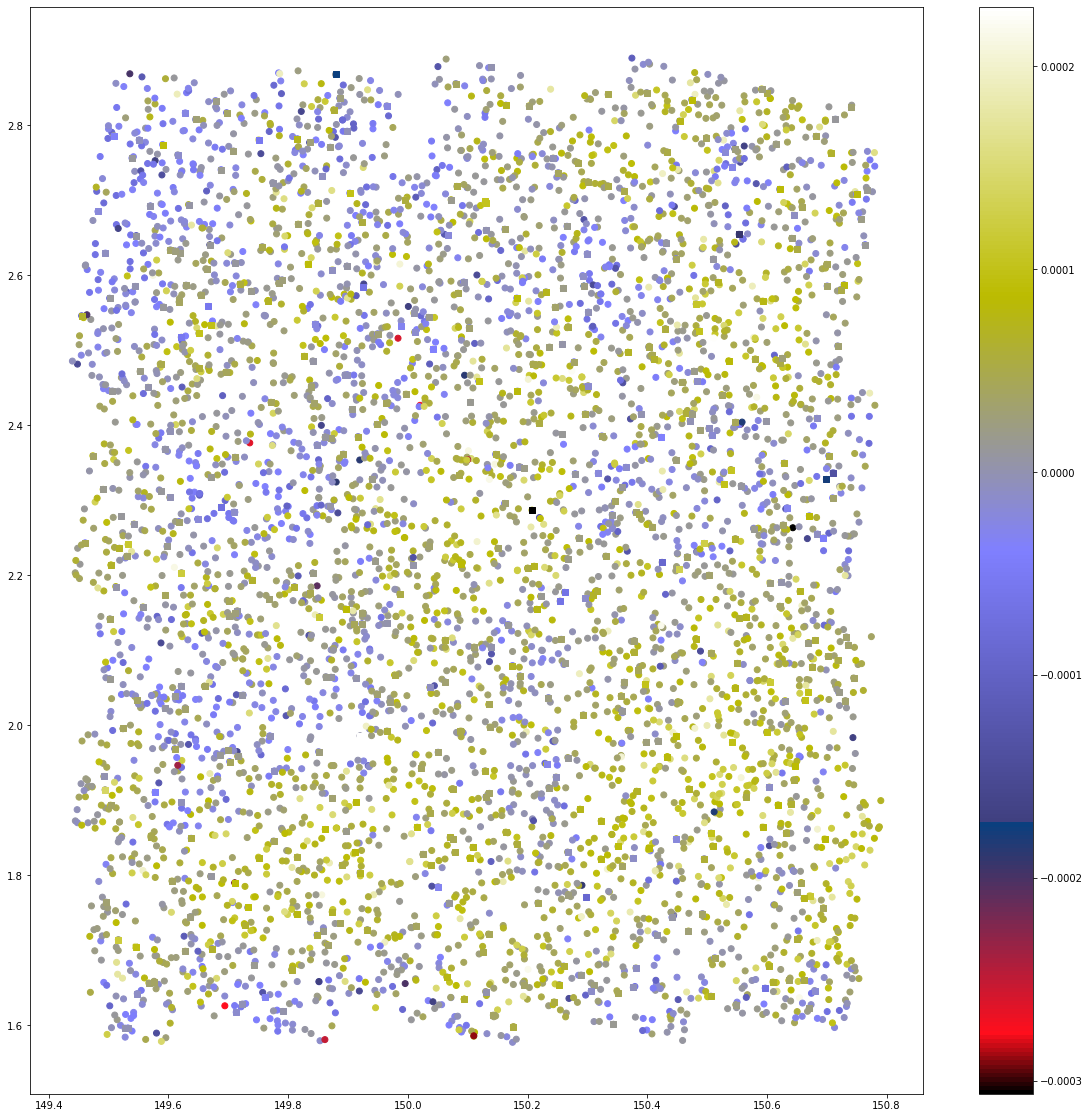

(2, 526)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.


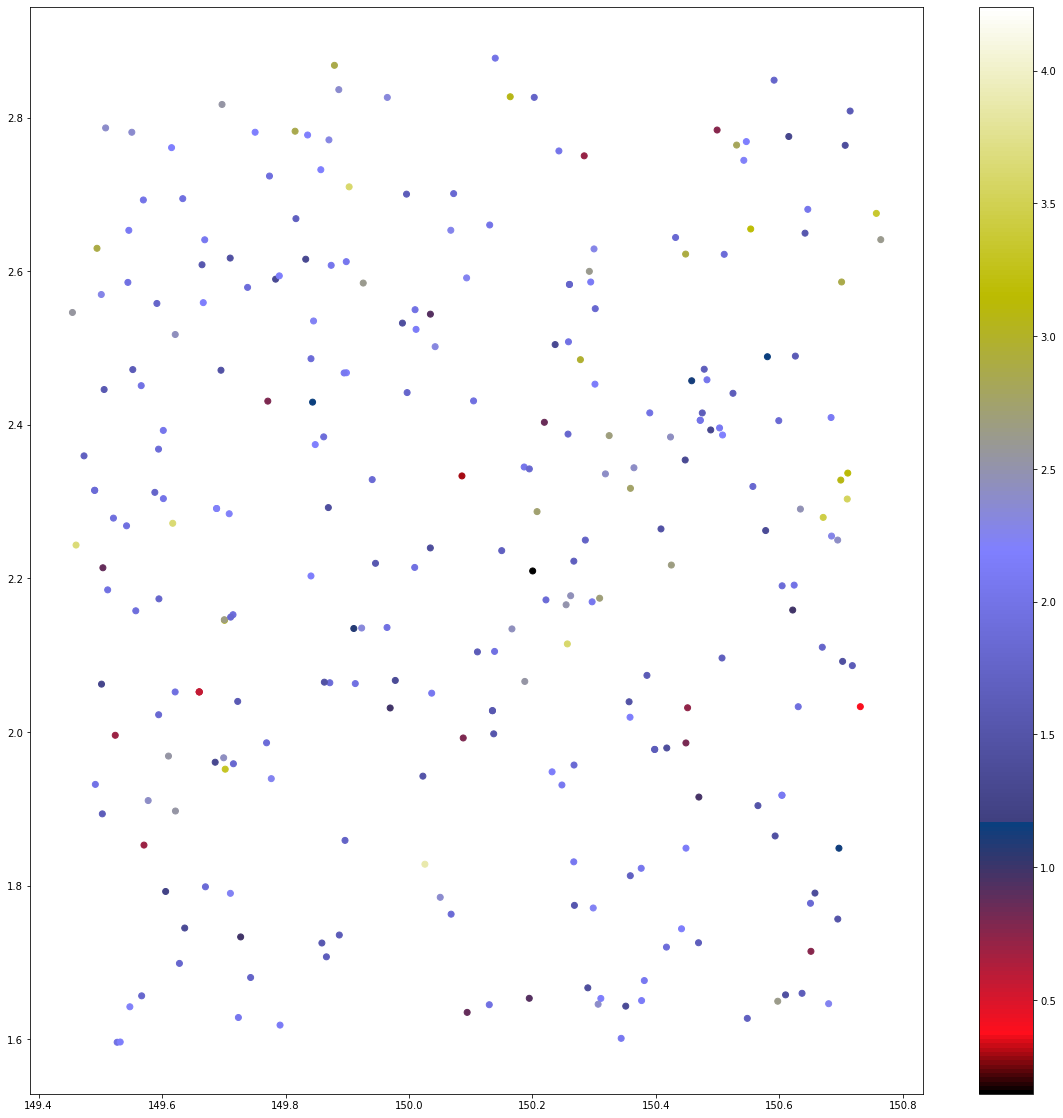

In [19]:
print(error.shape)
plt.figure(figsize = (20,20))
plt.scatter(cat_HST[:,0], cat_HST[:,1], c = cat_HST[:,-2], marker = 'o', cmap='gist_stern')
plt.scatter(test[:,0], test[:,1], c = error[:,0,0], marker = 's', cmap='gist_stern')
plt.colorbar()
plt.show()

print(((test[:,-2]-error[0])/test[:,-2]).shape)
plt.figure(figsize = (20,20))
plt.scatter(test[:,0], test[:,1], c = np.log10((test[:,-2]-error[:,0,0])/test[:,-2]*100), cmap='gist_stern')
plt.colorbar()
plt.show()

In [21]:
print(at.get_error(np.array([150.33064694, 2.06965889]), truth_cat, 
                  N_star = 10, method = 'nearest'))

[array([2.22364861e-05]), array([7.9102005e-06])]
